In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [3]:
class AgentState(TypedDict):
    """
    Represents the state of the agent.
    """
    name: str
    age: int
    final: str

In [13]:
def first_node(state:AgentState) -> AgentState:
    """
    The first node in the state graph.
    """
    state['final'] = f"Hi {state['name']}!"
    return state
def second_node(state:AgentState) -> AgentState:
    """
    The second node in the state graph.
    """
    state['final'] = state['final'] + f" You are {state['age']} years old."
    return state

In [14]:
graph = StateGraph(AgentState)

graph.add_node('first node', first_node)
graph.add_node('second node',second_node)

graph.set_entry_point('first node')
graph.add_edge('first node', 'second node')
graph.set_finish_point('second node')

app = graph.compile()


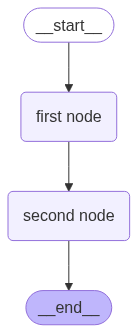

In [15]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
result = app.invoke({'name':'Shiva', 'age':'infinite'})
print(result)

{'name': 'Shiva', 'age': 'infinite', 'final': 'Hi Shiva! You are infinite years old.'}


### Exercise for Graph 3

In [18]:
from typing import List

In [27]:
class NewAgentState(TypedDict):
    name: str
    age: int
    skills: List[str]
    result: str

In [28]:
def node_one(state:NewAgentState) -> NewAgentState:
    """
    The first node in the new state graph.
    """
    state['result'] = f"{state['name']}, welcome to the system!"
    return state

def node_two(state:NewAgentState) -> NewAgentState:
    """
    The second node in the new state graph.
    """
    state['result'] += f" You are {state['age']} years old!"
    return state

def node_three(state:NewAgentState) -> NewAgentState:
    """
    The third node in the new state graph.
    """
    state['result'] += f" You have skills in : {', '.join(state['skills'])}."
    return state
    

In [29]:
graph = StateGraph(NewAgentState)

graph.add_node('node one', node_one)
graph.add_node('node two', node_two)
graph.add_node('node three', node_three)

graph.set_entry_point('node one')
graph.add_edge('node one', 'node two')
graph.add_edge('node two', 'node three')
graph.set_finish_point('node three')

app = graph.compile()

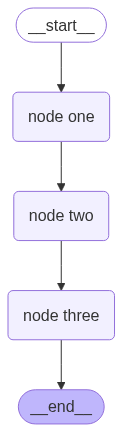

In [30]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:
final_result = app.invoke({
    'name': 'Shiva',
    'age': 'infinite',
    'skills': ['Omniscience', 'Omnipotence', 'Omnipresence']})
print(final_result)

{'name': 'Shiva', 'age': 'infinite', 'skills': ['Omniscience', 'Omnipotence', 'Omnipresence'], 'result': 'Shiva, welcome to the system! You are infinite years old! You have skills in : Omniscience, Omnipotence, Omnipresence.'}
